<a href="https://colab.research.google.com/github/sonaliaruk/hotel-booking-EDA/blob/main/EDA_of_hotel_bookingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Hotel Booking Analysis

By - **Sonali Aruk**

# 📄 Project Summary:

This project presents an Exploratory Data Analysis (EDA) on a hotel booking dataset.

✅ The data cleaning process was carried out in a separate Google Colab notebook to ensure the dataset was prepared and structured. This cleaned data was then used in this notebook to perform detailed analysis and visualizations related to hotel bookings :
* Understanding customer behavior
* Identifying booking and cancellation patterns
* Exploring revenue-driving factors
* Evaluating distribution channels and market segments

💡Key columns analyzed include:

- **Date-related features**: arrival_date_year, month, week_number, lead_time
- **Stay characteristics**: stays_in_weekend_nights, stays_in_week_nights, total_guests
- **Customer demographics**: adults, children, babies, customer_type, is_repeated_guest
- **Booking details**: hotel, distribution_channel, market_segment, deposit_type, agent
- **Outcome variables**: is_canceled, adr, reservation_status

# Phase1 : Data Analysis

✨ The cleaned datasets are analyzed to extract meaningful insights:

✅ Key Analyses Performed:
1. **Cancellation Patterns Across Hotel Types** : Analyzed how cancellation rates differ between City Hotels and Resort Hotels.

2. **Monthly Booking and Cancellation Trends** : Explored seasonality in bookings and cancellations across months.

3. **Customer Type vs Revenue and Cancellation** : Investigated which customer segments contribute more revenue (adr) and how their cancellation behavior differs.

4. **Distribution Channel Insights** : Examined how bookings come through various channels (e.g., TA/TO, Direct) and their impact on cancellations.

5. **Lead Time vs Cancellation Rate** : Analyzed the relationship between the number of days booked in advance (lead time) and the likelihood of cancellation.

# Phase2 : Data Visualization
Insights are visualized to make the findings more interpretable and actionable:

🧭Tools used : matplotlib , seaborn

**📊 Visualizations Used:**
1. **Countplots (sns.countplot)** : for most categorical comparisons

2. **Pie charts** : for customer type, meal distribution, booking channel
Bar charts with percentage annotations – for revenue and type distribution

3. **Histograms** : for lead time distribution

4. **Line charts** : for monthly trends in booking and cancellation

5. **Stacked bar charts** : for cancellation comparisons (e.g., hotel, channel)

6. **Horizontal stacked bar chart** : for country-wise cancellation

7. **Boxplot** : typically used to show distribution of ADR or cancellation by category

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hotel_eda = pd.read_csv('/content/drive/MyDrive/cleaned_hotel_data (1).csv')

In [ ]:
pd.set_option('display.max_columns',None)
hotel_eda

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,No,342,2015,July,27,1,0,0,2,0,0,Bed & Breakfast,Portugal,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,No,737,2015,July,27,1,0,0,2,0,0,Bed & Breakfast,Portugal,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,No,7,2015,July,27,1,0,1,1,0,0,Bed & Breakfast,United Kingdom,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,No,13,2015,July,27,1,0,1,1,0,0,Bed & Breakfast,United Kingdom,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,No,14,2015,July,27,1,0,2,2,0,0,Bed & Breakfast,United Kingdom,Online TA,Travel Agent/Tour Operator,0,0,0,A,A,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87385,City Hotel,No,23,2017,August,35,30,2,5,2,0,0,Bed & Breakfast,Belgium,Offline TA/TO,Travel Agent/Tour Operator,0,0,0,A,A,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06
87386,City Hotel,No,102,2017,August,35,31,2,5,3,0,0,Bed & Breakfast,France,Online TA,Travel Agent/Tour Operator,0,0,0,E,E,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07
87387,City Hotel,No,34,2017,August,35,31,2,5,2,0,0,Bed & Breakfast,Germany,Online TA,Travel Agent/Tour Operator,0,0,0,D,D,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07
87388,City Hotel,No,109,2017,August,35,31,2,5,2,0,0,Bed & Breakfast,United Kingdom,Online TA,Travel Agent/Tour Operator,0,0,0,A,A,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#show all columns
hotel_eda.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# convert 1 and 0 in is_repeated_guest column to yes and no
hotel_eda['is_repeated_guest'] = hotel_eda['is_repeated_guest'].replace({0: 'No', 1:'Yes'})

In [ ]:
#clean resevation_status column
hotel_eda['reservation_status'] = hotel_eda['reservation_status'].replace('No-Show','Canceled')

In [ ]:
#convert undefined meal to sc
hotel_eda['meal'] = hotel_eda['meal'].replace('Undefined','Self-catering')

 check canacellation status in hotel


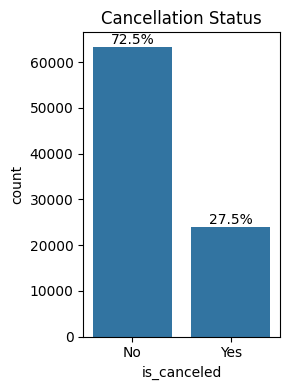

In [ ]:
# Total number of bookings
total = len(hotel_eda)

plt.figure(figsize=(3, 4))
x = sns.countplot(x='is_canceled', data=hotel_eda)
x.set_title('Cancellation Status')

# Add percentage labels on bars
for bar in x.patches:
    count = bar.get_height()
    percent = (count / total) * 100
    x.annotate(f'{percent:.1f}%',
               (bar.get_x() + bar.get_width() / 2, count),
               ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

INSIGHT - Most customers completed their bookings, indicating a low cancellation rate

hotel type


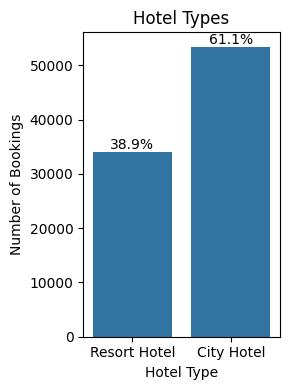

In [ ]:
# Total number of records
total = len(hotel_eda)

plt.figure(figsize=(3, 4))
x = sns.countplot(x='hotel', data=hotel_eda)

# Add percentage labels
for bar in x.patches:
    count = bar.get_height()
    percent = (count / total) * 100
    x.annotate(f'{percent:.1f}%',
               (bar.get_x() + bar.get_width() / 2, count),
               ha='center', va='bottom', fontsize=10)

x.set_title('Hotel Types')
x.set_xlabel('Hotel Type')
x.set_ylabel('Number of Bookings')

plt.tight_layout()
plt.show()


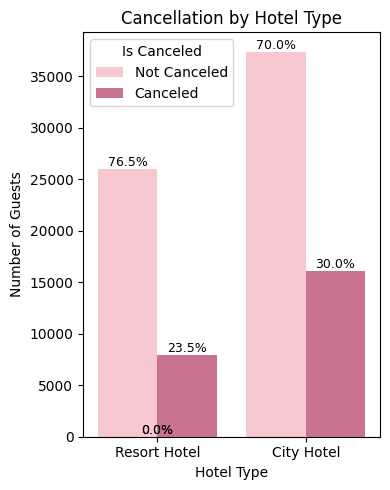

In [ ]:
# Total count per hotel
hotel_totals = hotel_eda['hotel'].value_counts()

plt.figure(figsize=(4, 5))
x = sns.countplot(x='hotel', data=hotel_eda, hue='is_canceled', palette=['pink','#d7658b'])

# Get list of unique hotel types in the same order as countplot x-axis
hotel_order = x.get_xticks()
hotel_labels = [tick.get_text() for tick in x.get_xticklabels()]
hotel_mapping = dict(zip(hotel_order, hotel_labels))

n_hue = hotel_eda['is_canceled'].nunique()

# Annotate each bar with % label
for i, bar in enumerate(x.patches):
    height = bar.get_height()

    # Get bar center x-position
    x_center = bar.get_x() + bar.get_width() / 2

    # Round the x-axis position to nearest tick index
    tick_index = round(x_center)

    # Get hotel name from tick position
    hotel_name = hotel_mapping.get(tick_index)
    if hotel_name not in hotel_totals:
        continue  # Skip if mapping fails

    total = hotel_totals[hotel_name]
    percent = (height / total) * 100 if total else 0

    x.annotate(f'{percent:.1f}%',
               (x_center, height),
               ha='center', va='bottom', fontsize=9)

plt.title('Cancellation by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Guests')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()



INSIGHT - Although more bookings happen at city hotels, the cancellation rate is higher for city hotels (30%) than resort hotels (14.9%), showing guests cancel more often in city hotels.

In [ ]:
# Filter for only City Hotel bookings that were not_canceled
city_no_canceled= hotel_eda[(hotel_eda['hotel'] == 'City Hotel') & (hotel_eda['is_canceled'] == 'No')]  # or == 0 if numeric

# Count no_cancellations by country
top_no_canceling_countries_city = city_no_canceled['country'].value_counts().head(10)

# Show result
print("Top 10 countries with most no_cancellations in City Hotel:")
print(top_no_canceling_countries_city)


Top 10 countries with most no_cancellations in City Hotel:
country
Portugal          8330
France            5866
Germany           3536
United Kingdom    3229
Spain             2666
Italy             1644
Belgium           1323
Netherlands       1132
United States     1023
Brazil             953
Name: count, dtype: int64


In [ ]:
# Filter for only City Hotel bookings that were canceled
city_canceled = hotel_eda[(hotel_eda['hotel'] == 'City Hotel') & (hotel_eda['is_canceled'] == 'Yes')]  # or == 1 if numeric

# Count cancellations by country
top_canceling_countries_city = city_canceled['country'].value_counts().head(10)

# Show result
print("Top 10 countries with most cancellations in City Hotel:")
print(top_canceling_countries_city)

Top 10 countries with most cancellations in City Hotel:
country
Portugal          4880
France            1546
United Kingdom    1299
Spain             1118
Italy             1003
Germany            931
Brazil             636
United States      394
China              383
Belgium            367
Name: count, dtype: int64


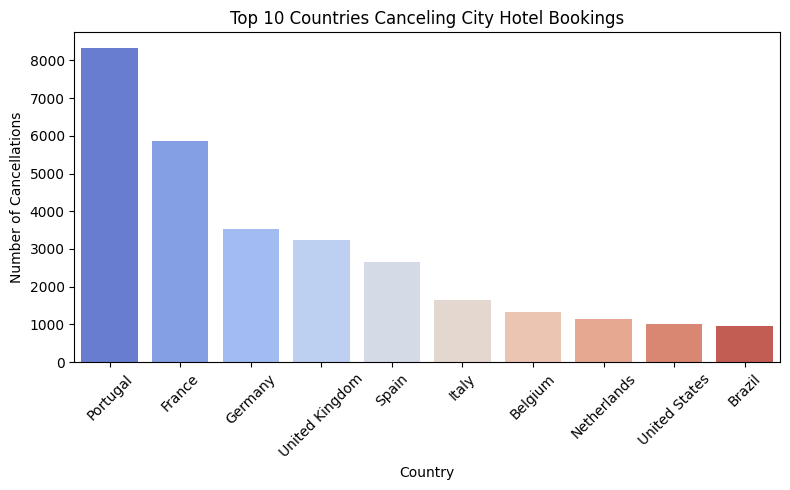

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_canceling_countries_city.index, y=top_canceling_countries_city.values, palette='coolwarm')
plt.title('Top 10 Countries Canceling City Hotel Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


INSIGHT - most of cancellation come from country name - Portugal , France...

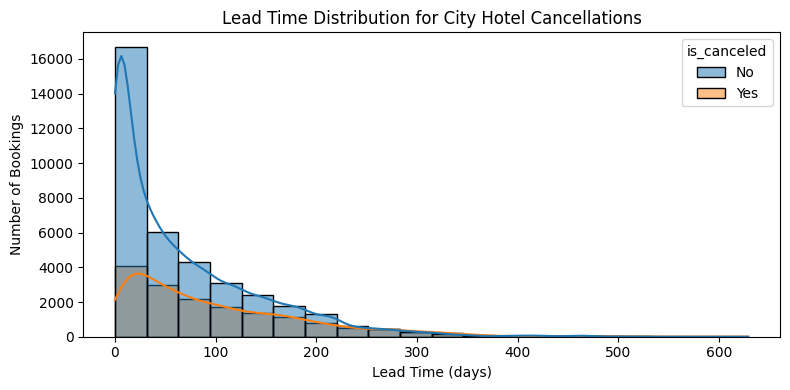

In [ ]:
# Filter for only City Hotel
city_canceled2 = hotel_eda[(hotel_eda['hotel'] == 'City Hotel')]

# Step: Plot histogram of lead_time for canceled and no_canceled City Hotel bookings
plt.figure(figsize=(8, 4))
sns.histplot(data=city_canceled2, x='lead_time', hue ='is_canceled' ,bins=20, kde=True, color='teal')

plt.title('Lead Time Distribution for City Hotel Cancellations')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()


INSIGHT - Guests who book City Hotels far in advance are more likely to cancel, while those who book closer to their check-in date are less likely to cancel.

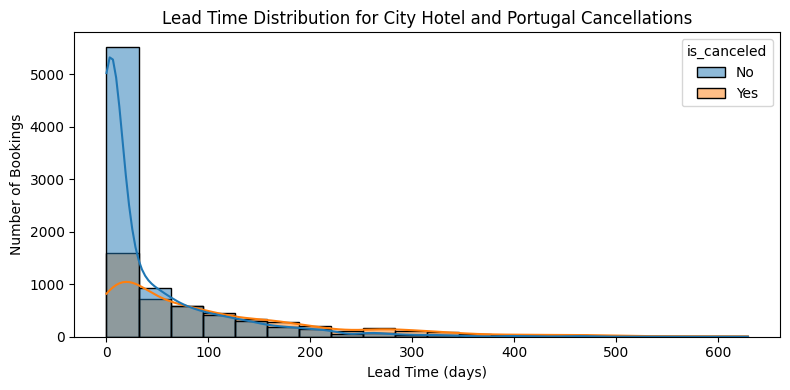

In [ ]:
# Filter for only City Hotel and city
city_canceled2 = hotel_eda[(hotel_eda['hotel'] == 'City Hotel') & (hotel_eda['country'] == 'Portugal')]

# Step: Plot histogram of lead_time for canceled and no cancelled City Hotel bookings
plt.figure(figsize=(8, 4))
sns.histplot(data=city_canceled2, x='lead_time', hue ='is_canceled' ,bins=20, kde=True, color='teal')

plt.title('Lead Time Distribution for City Hotel and Portugal Cancellations')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

INSIGHT - Guests who book City Hotels from Portugal far in advance are more likely to cancel, while those who book closer to their check-in date are less likely to cancel.

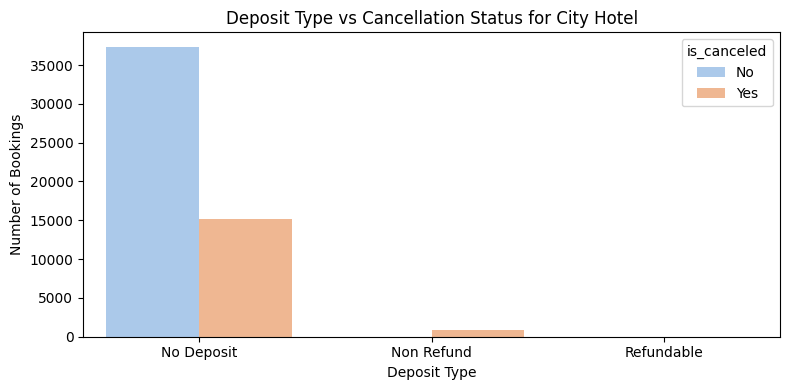

In [ ]:
city_canceled = hotel_eda[hotel_eda['hotel'] == 'City Hotel']

# Plot count of deposit types by cancellation status
plt.figure(figsize=(8, 4))
sns.countplot(data=city_canceled, x='deposit_type', hue='is_canceled', palette='pastel')

plt.title('Deposit Type vs Cancellation Status for City Hotel')
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()



INSIGHT - Since most bookings come from the 'No Deposit' type, it also accounts for the highest number of cancellations. Additionally, the 'Non-Refundable' deposit type has a higher cancellation rate compared to its no_cancellation.

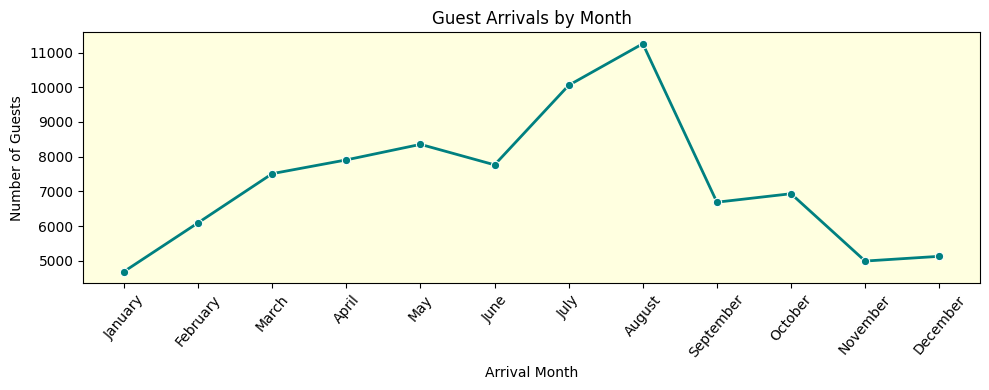

In [ ]:
# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Step 1: Count guest arrivals per month
monthly_counts = hotel_eda['arrival_date_month'].value_counts()

# Step 2: Reindex to ensure correct month order
monthly_counts = monthly_counts.reindex(month_order, fill_value=0)

# Step 3: Plot line chart
plt.figure(figsize=(10, 4))
x = sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', linewidth=2, color='teal')

# Change just the plot (axes) background
x.set_facecolor('lightyellow')

# Labels and titles
plt.xticks(rotation=50)
plt.title('Guest Arrivals by Month')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Guests')
plt.tight_layout()
plt.show()




> INSIGHT - in month july and august guests number is maximum


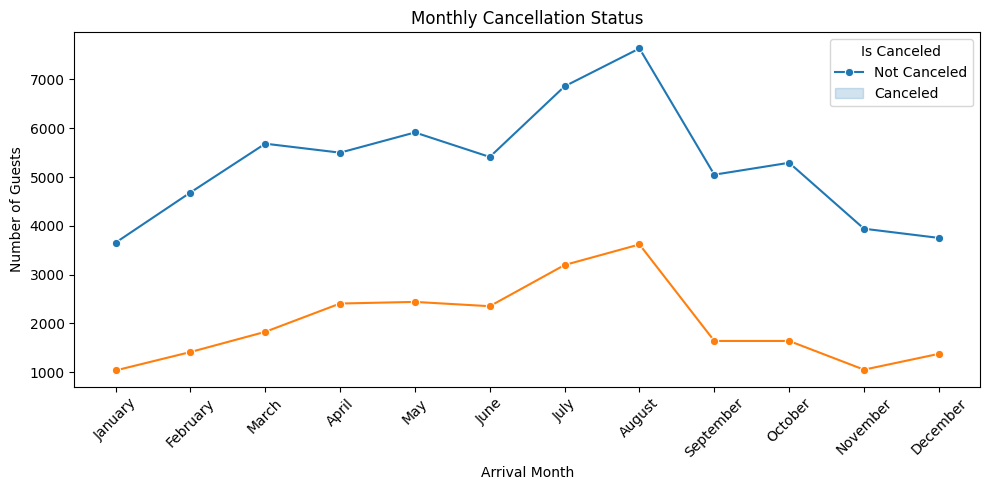

In [ ]:
# Step 1: Group and count cancellations and non-cancellations
monthly_data = hotel_eda.groupby(['arrival_date_month', 'is_canceled']).size().reset_index(name='count')

# Step 2: Ensure months are in correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['arrival_date_month'] = pd.Categorical(monthly_data['arrival_date_month'], categories=month_order, ordered=True)
monthly_data = monthly_data.sort_values('arrival_date_month')

# Step 3: Plot line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x='arrival_date_month', y='count', hue='is_canceled', marker='o')

plt.xticks(rotation=45)
plt.title('Monthly Cancellation Status')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Guests')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()


INSIGHT - Cancellations were highest during the peak summer months July and August, indicating that while demand was high,
guests were also more likely to cancel during this period.

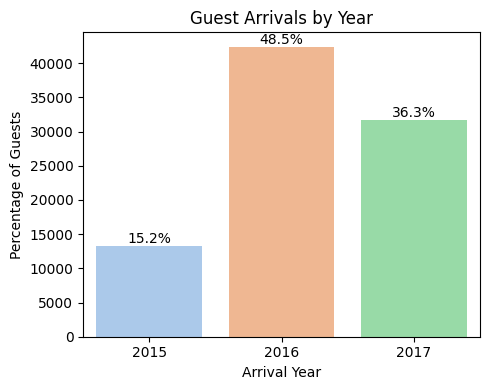

In [ ]:
# Total number of guests
total_guests = len(hotel_eda)

plt.figure(figsize=(5, 4))
x = sns.countplot(x='arrival_date_year', data=hotel_eda, palette ='pastel')

# Add percentage labels
for bar in x.patches:
    count = bar.get_height()
    percent = (count / total_guests) * 100
    x.annotate(f'{percent:.1f}%',
               (bar.get_x() + bar.get_width() / 2, count),
               ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0)
plt.title('Guest Arrivals by Year')
plt.xlabel('Arrival Year')
plt.ylabel('Percentage of Guests')
plt.tight_layout()
plt.show()


INSIGHT - Guest arrivals increased sharply from 2015 to 2016, peaking in 2016 (48.5%), but then dropped in 2017 to 36.3% (in 2017 we have data from january to september only but in 2016 and 2015 we have 12 months data )

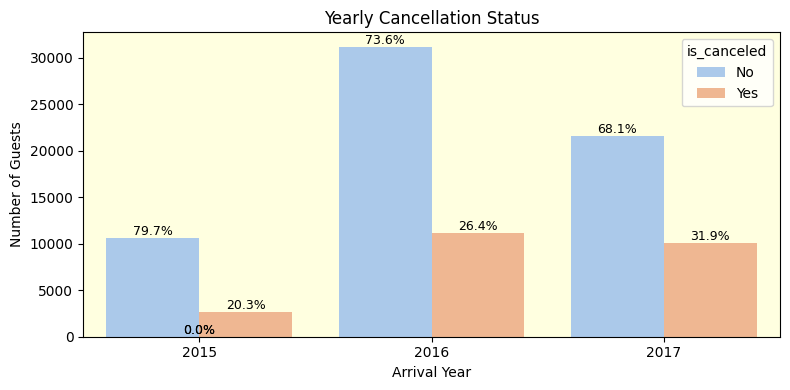

In [ ]:
# Count of bookings grouped by year and cancellation status
year_cancel_counts = hotel_eda.groupby(['arrival_date_year', 'is_canceled']).size().reset_index(name='count')

# Total bookings per year
year_totals = hotel_eda['arrival_date_year'].value_counts().to_dict()

plt.figure(figsize=(8, 4))
x = sns.countplot(x='arrival_date_year', data=hotel_eda, hue='is_canceled', palette='pastel')

# Add percentage annotations on each bar
for bar in x.patches:
    height = bar.get_height()
    x_val = bar.get_x() + bar.get_width() / 2
    year = bar.get_x() + bar.get_width() / 2
    year_label = bar.get_x() + bar.get_width() / 2

    # Get actual label from bar location
    tick_label = bar.get_x() + bar.get_width() / 2
    label_index = round(tick_label)  # Rough x-tick mapping
    xtick_labels = [tick.get_text() for tick in x.get_xticklabels()]

    # Safe access
    if label_index < len(xtick_labels):
        year_label = xtick_labels[label_index]
        total = year_totals.get(int(year_label), 0)
        percent = (height / total) * 100 if total else 0
        x.annotate(f'{percent:.1f}%',
                   (bar.get_x() + bar.get_width() / 2, height),
                   ha='center', va='bottom', fontsize=9)

# Set background color (axes only)
x.set_facecolor('lightyellow')

# Final labels
plt.title('Yearly Cancellation Status')
plt.xlabel('Arrival Year')
plt.ylabel('Number of Guests')
plt.tight_layout()
plt.show()


INSIGHT - 2016 saw the highest number of bookings and cancellations,
while 2017 had fewer bookings than 2016 but a higher cancellation rate, showing a rising trend in cancellations

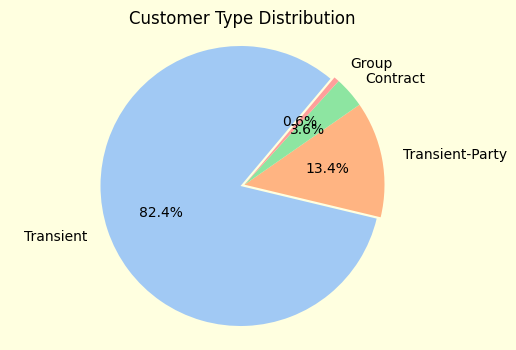

In [ ]:
# Count customer types
customer_counts = hotel_eda['customer_type'].value_counts()

# Define explode to emphasize the largest segment
explode = [0.03 if i == customer_counts.idxmax() else 0 for i in customer_counts.index]

# Plot pie chart with labels and % outside
plt.figure(figsize=(6, 4),facecolor ='lightyellow')
plt.pie(customer_counts,
        labels=customer_counts.index,
        autopct='%1.1f%%',
        startangle=50,
        colors=sns.color_palette("pastel"),
        explode=explode,
        labeldistance=1.15)  # Push labels outward


plt.title('Customer Type Distribution')
plt.axis('equal')
plt.show()




INSIGHT -  trasient i.e individual guest is more than other customer type

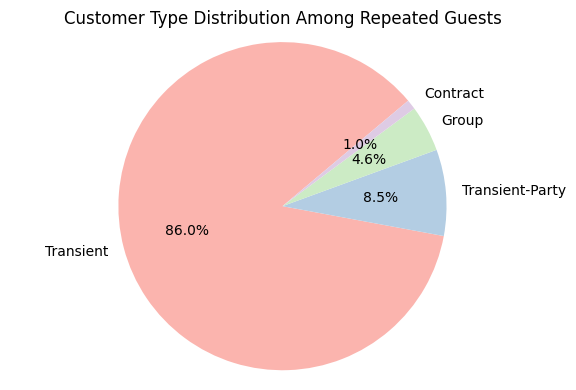

In [ ]:
# Filter repeated guests
repeated_guests = hotel_eda[hotel_eda['is_repeated_guest'] == 'Yes']  # or == 1 if numeric

# Count customer types
repeated_customer_counts = repeated_guests['customer_type'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 4))
plt.pie(repeated_customer_counts,
        labels=repeated_customer_counts.index,
        autopct='%1.1f%%',
        startangle=40,
        colors=plt.cm.Pastel1.colors)

plt.title('Customer Type Distribution Among Repeated Guests')
plt.axis('equal')  # Make pie circular
plt.tight_layout()
plt.show()


INSIGHT - most guest come again is Transient

Text(0, 0.5, 'Number of Guests')

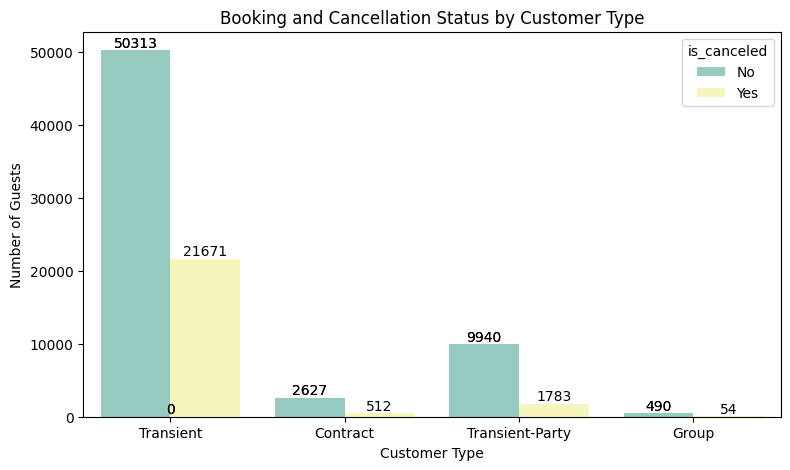

In [ ]:
plt.figure(figsize=(9,5))
x = sns.countplot(x = 'customer_type' , data = hotel_eda  , hue = 'is_canceled' , palette='Set3')
x.bar_label(x.containers[0])
plt.xticks(rotation = 0)

# Add value labels on top of each bar
for bar in x.patches:
    height = int(bar.get_height())
    x.annotate(f'{height}',
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.title('Booking and Cancellation Status by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Guests')





INSIGHT - Most bookings and cancellations come from Transient customers.
Contract and Group customers cancel the least.

which customer type give more revenue

In [ ]:
revenue_by_customer = hotel_eda.groupby('customer_type')['adr'].sum().reset_index()
revenue_by_customer = revenue_by_customer.sort_values(by='adr', ascending=False)
revenue_by_customer

,customer_type,adr
2,Transient,7922727.23
3,Transient-Party,1028059.64
0,Contract,291151.78
1,Group,45892.90


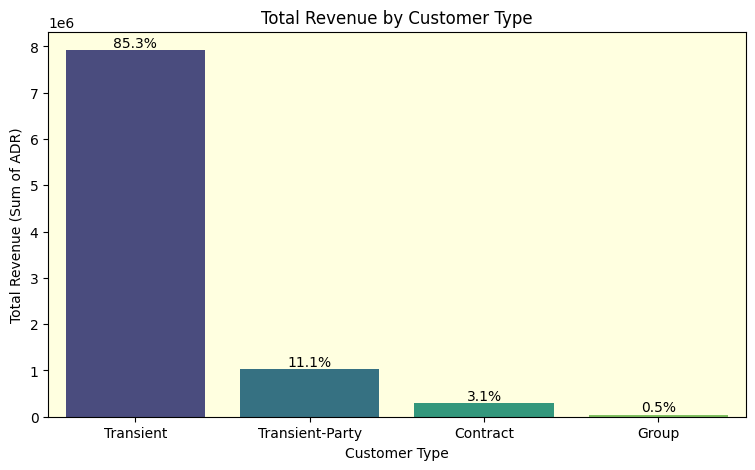

In [ ]:
# Ensure you're using the same revenue data
labels = revenue_by_customer['customer_type']
sizes = revenue_by_customer['adr']  # Assuming 'adr' here represents total revenue
explode = [0.05 if size/sum(sizes) < 0.1 else 0 for size in sizes]

total_adr = revenue_by_customer['adr'].sum()

plt.figure(figsize=(9, 5))
x = sns.barplot(x='customer_type', y='adr', data=revenue_by_customer, palette='viridis')

# Add percentage labels on bars
for bar in x.patches:
    count = bar.get_height()
    percent = (count / total_adr) * 100
    x.annotate(f'{percent:.1f}%',
               (bar.get_x() + bar.get_width() / 2, count),
               ha='center', va='bottom', fontsize=10)
# Change just the plot (axes) background
x.set_facecolor('lightyellow')

plt.xticks(rotation=0)
plt.title('Total Revenue by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Revenue (Sum of ADR)')
plt.show()


INSIGHT - from above chart its clear that transient give more revenue to hotel

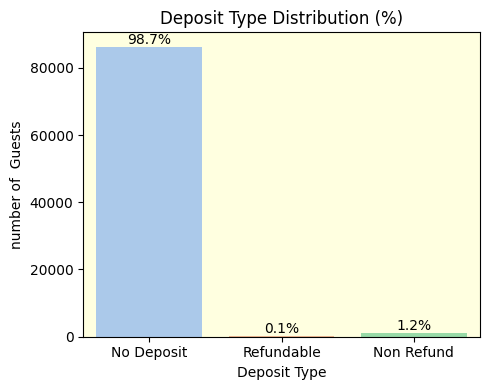

In [ ]:
# Total number of guests (rows)
total = len(hotel_eda)

plt.figure(figsize=(5, 4))
x = sns.countplot(x='deposit_type', data=hotel_eda, palette= 'pastel')

# Add percentage labels on bars
for bar in x.patches:
    count = bar.get_height()
    percent = (count / total) * 100
    x.annotate(f'{percent:.1f}%',
               (bar.get_x() + bar.get_width() / 2, count),
               ha='center', va='bottom', fontsize=10)
# Change just the plot (axes) background
x.set_facecolor('lightyellow')

plt.xticks(rotation=0)
plt.title('Deposit Type Distribution (%)')
plt.xlabel('Deposit Type')
plt.ylabel('number of  Guests')
plt.tight_layout()
plt.show()


INSIGHT - No Deposit type is more than other type

In [ ]:
revenue = hotel_eda.groupby('deposit_type')['adr'].sum().reset_index()
revenue= revenue.sort_values(by='adr', ascending=False)
revenue

,deposit_type,adr
0,No Deposit,9188780.40
1,Non Refund,90498.82
2,Refundable,8552.33


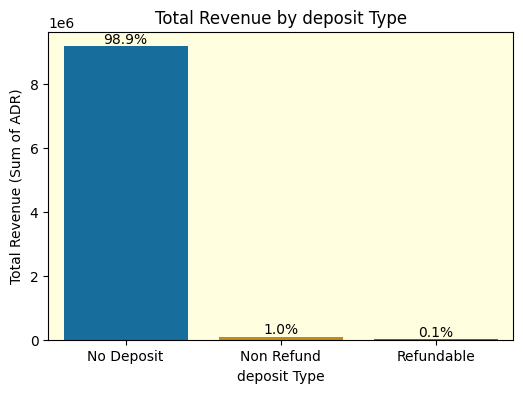

In [ ]:
plt.figure(figsize=(6, 4))
x = sns.barplot(x='deposit_type', y='adr', data=revenue, palette='colorblind')

total_adr = revenue['adr'].sum()

# Add percentage labels on each bar
for bar in x.patches:
    height = bar.get_height()
    percent = (height / total_adr) * 100
    x.annotate(f'{percent:.1f}%',                  # Show percentage
               (bar.get_x() + bar.get_width() / 2, height),
               ha='center', va='bottom', fontsize=10)

# Change just the plot (axes) background
x.set_facecolor('lightyellow')

plt.xticks(rotation=0)
plt.title('Total Revenue by deposit Type')
plt.xlabel('deposit Type')
plt.ylabel('Total Revenue (Sum of ADR)')
plt.show()

INSIGHT -  no deposit type give more revenue as compare to other

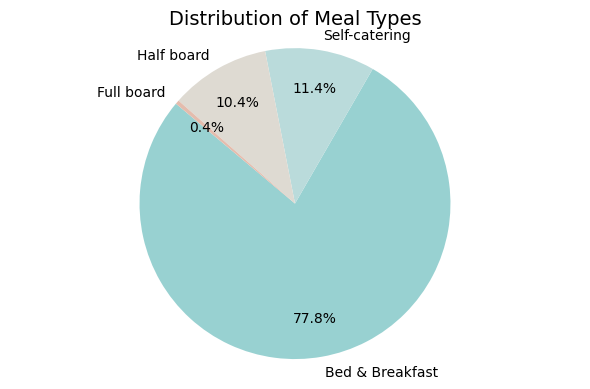

In [ ]:
# Get the meal type counts
meal_counts = hotel_eda['meal'].value_counts()

# Custom colors
colors = sns.color_palette(['#98d1d1', '#badbdb', '#dedad2', '#e4bcad'])

# Plot pie chart
plt.figure(figsize=(6, 4))
plt.pie(meal_counts,
        labels=meal_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors = colors,
        labeldistance=1.1,       # push labels outward
        pctdistance=0.75         # push percentages closer to the edge
       )

plt.title('Distribution of Meal Types', fontsize=14)
plt.axis('equal')  # Make the pie chart a circle
plt.tight_layout()
plt.show()


INSIGHT -  The majority of guests prefer the "Bed & Breakfast" meal option, accounting for over 67,000 bookings,while "Full board" is the least chosen, suggesting limited demand for all-inclusive meals.

Text(0, 0.5, 'Number of Guests')

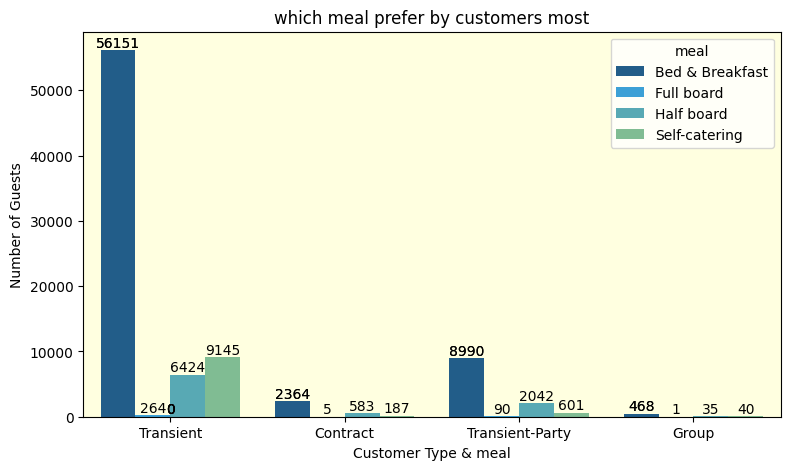

In [ ]:
plt.figure(figsize=(9,5))
x = sns.countplot(x = 'customer_type' , data = hotel_eda  , hue = 'meal',palette = ['#115f9a','#22a7f0','#48b5c4','#76c68f'] )
x.bar_label(x.containers[0])
plt.xticks(rotation = 0)

# Add value labels on top of each bar
for bar in x.patches:
    height = int(bar.get_height())
    x.annotate(f'{height}',
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

# Change just the plot (axes) background
x.set_facecolor('lightyellow')

plt.title('which meal prefer by customers most')
plt.xlabel('Customer Type & meal')
plt.ylabel('Number of Guests')

INSIGHT - Transient customers strongly prefer Bed & Breakfast, with over 56,000 bookings.Self-catering and Half board are also popular among transient customers.Contract and Group customers show very low preference for Full board, and overall group bookings are minimal across all meal types

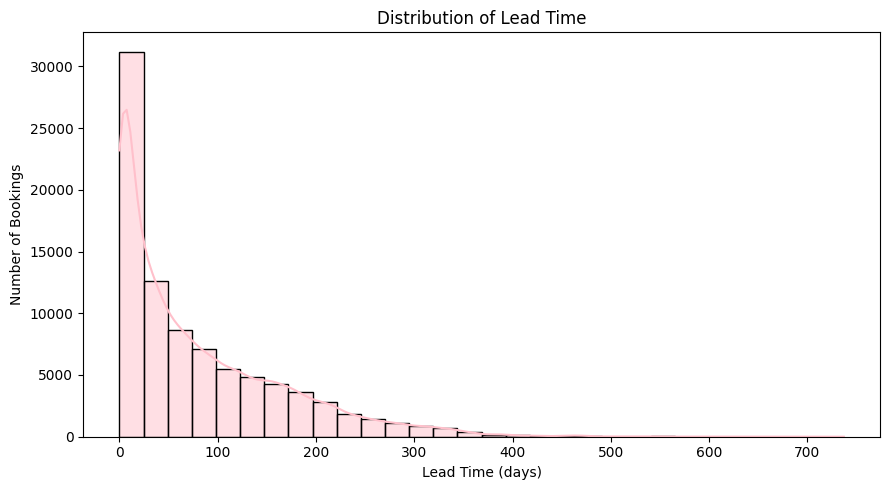

In [ ]:
plt.figure(figsize=(9, 5))
sns.histplot(data=hotel_eda, x='lead_time', bins=30, color='pink', kde=True)

plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()


INSIGHT - Most bookings were made with a short lead time (less than 50 days), and the number of bookings drops sharply as lead time increases.

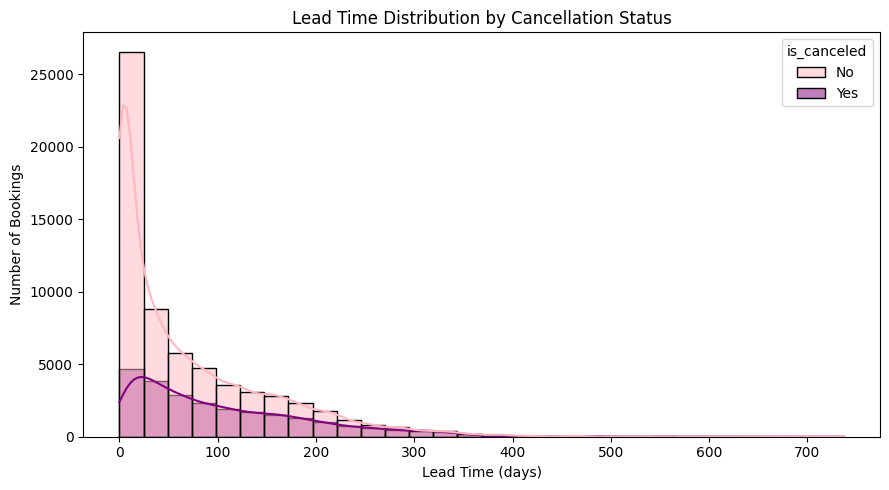

In [ ]:
plt.figure(figsize=(9, 5))
sns.histplot(data=hotel_eda, x='lead_time',hue = 'is_canceled', bins=30, palette = ['lightpink','purple'], kde=True)

plt.title('Lead Time Distribution by Cancellation Status')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

INSIGHT - Bookings with longer lead times (booked far in advance) have a higher chance of getting canceled, while bookings made closer to the stay date are less likely to be canceled.

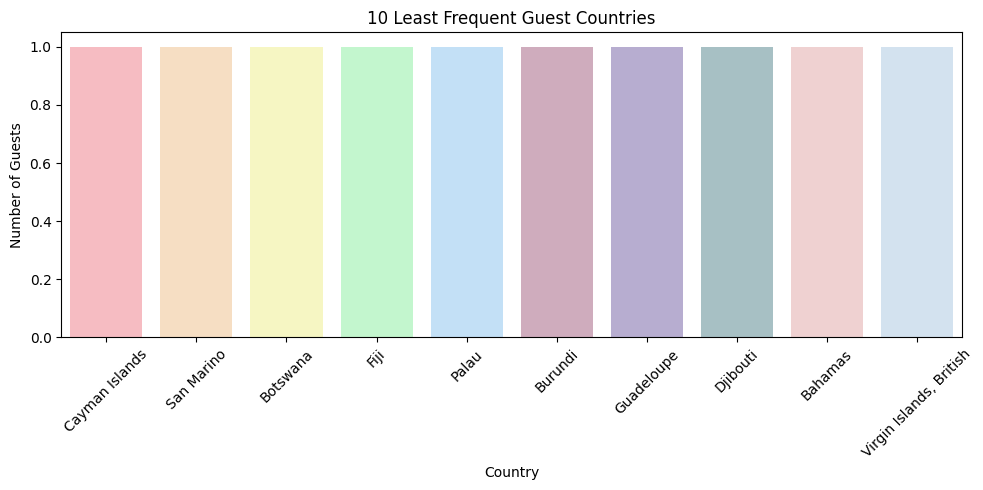

In [ ]:
# Get 10 least frequent countries
least_countries = hotel_eda['country'].value_counts().nsmallest(10)

# Filter dataset to include only those countries
filtered_least_data = hotel_eda[hotel_eda['country'].isin(least_countries.index)]

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(
    x='country',
    data=filtered_least_data,
    order=least_countries.index,
    palette=['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff',
             '#d5a6bd', '#b4a7d6', '#a2c4c9', '#f4cccc', '#cfe2f3']
)
plt.xticks(rotation=45)
plt.title('10 Least Frequent Guest Countries')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.tight_layout()
plt.show()


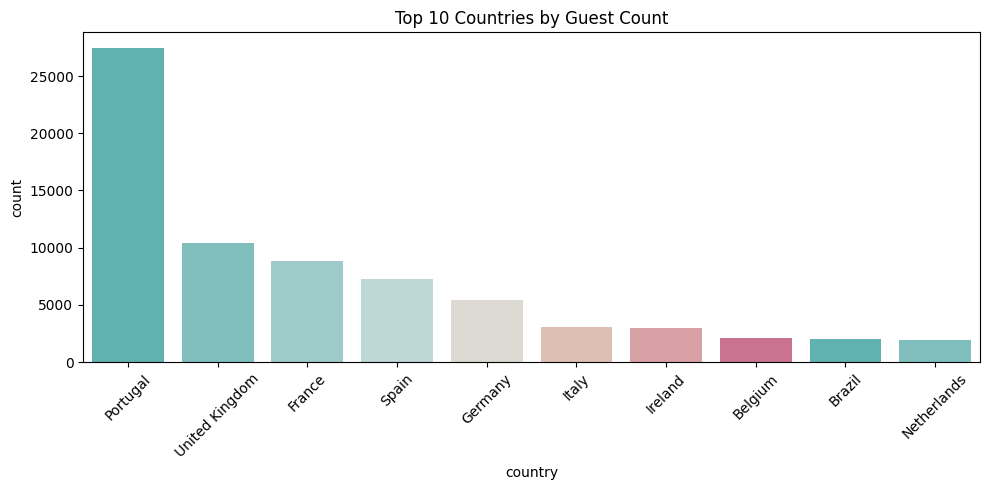

In [ ]:
# Get top 10 countries by count
top_countries = hotel_eda['country'].value_counts().nlargest(10)

# Filter dataset
filtered_data = hotel_eda[hotel_eda['country'].isin(top_countries.index)]

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(x='country', data=filtered_data, order=top_countries.index ,palette= ['#54bebe', '#76c8c8', '#98d1d1', '#badbdb', '#dedad2', '#e4bcad', '#df979e', '#d7658b'])
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Guest Count')
plt.tight_layout()
plt.show()


INSIGHT - -Portugal has the highest number of hotel guests among all countries, followed by the United Kingdom and France, showing that most guests come from nearby European countries

INSIGHT - Cayman Islands, Fiji, and Bahamas, had only 1 guest each, making them the least frequent guest countries

In [ ]:
# Filter only canceled bookings
canceled_bookings = hotel_eda[hotel_eda['is_canceled'] == 'Yes']  # or 1 if using numeric

# Count cancellations by country
top_canceling_countries = canceled_bookings['country'].value_counts().head(10)

# Display results
print("Top 10 Countries with the Most Cancellations:")
print(top_canceling_countries)


Top 10 Countries with the Most Cancellations:
country
Portugal          9786
United Kingdom    1985
Spain             1862
France            1733
Italy             1075
Germany           1053
Brazil             727
Ireland            668
United States      459
Belgium            411
Name: count, dtype: int64


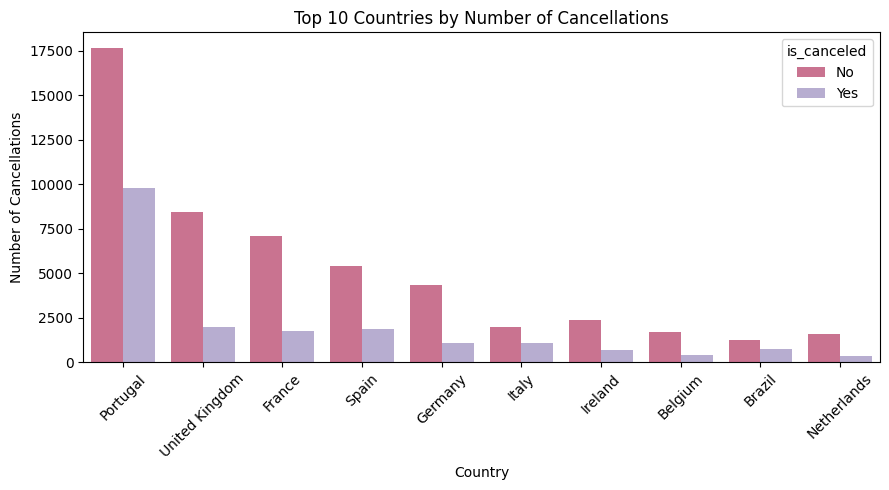

In [ ]:
# Get top 10 countries by count
top_countries = hotel_eda['country'].value_counts().nlargest(10)

# Filter dataset
filtered_data = hotel_eda[hotel_eda['country'].isin(top_countries.index)]

plt.figure(figsize=(9, 5))
x = sns.countplot(data=filtered_data, order=top_countries.index, x='country',hue = 'is_canceled', palette = ['#d7658b' , '#b4a7d6'])


plt.title('Top 10 Countries by Number of Cancellations')
plt.xlabel('Country')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

INSIGHT - Portugal has the highest number of booking cancellations, far more than any other country. Other countries like the UK, Spain, and France also have many cancellations, but much less compared to Portugal.
Portugal has both the highest number of bookings and the highest number of cancellations.This could point to uncertain travel plans, local booking trends, or price-sensitive behavior among guests from Portugal.

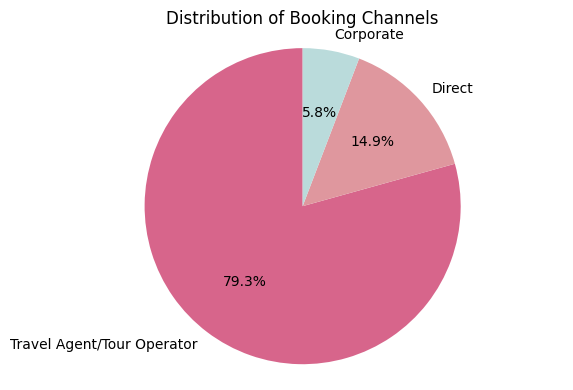

In [ ]:
#Count each distribution channel
channel_counts = hotel_eda['distribution_channel'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 4))
plt.pie(channel_counts,
        labels=channel_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#d7658b','#df979e', '#badbdb'])

plt.title('Distribution of Booking Channels')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.tight_layout()
plt.show()


INSIGHT - Most bookings come through Travel Agents/Tour Operators (79.3%), while Direct (14.9%) and Corporate (5.8%) channels are used much less

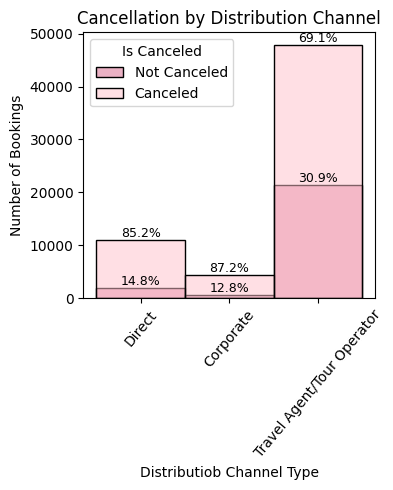

In [ ]:
# Total count per hotel
distribution_channel_totals = hotel_eda['distribution_channel'].value_counts()

plt.figure(figsize=(4, 5))
x = sns.histplot(x='distribution_channel', data=hotel_eda, hue='is_canceled', palette=['pink','#d7658b'])

# Get list of unique hotel types in the same order as countplot x-axis
distribution = x.get_xticks()
distribution_labels = [tick.get_text() for tick in x.get_xticklabels()]
distribution_mapping = dict(zip(distribution, distribution_labels))

n_hue = hotel_eda['is_canceled'].nunique()

# Annotate each bar with % label
for i, bar in enumerate(x.patches):
    height = bar.get_height()

    # Get bar center x-position
    x_center = bar.get_x() + bar.get_width() / 2

    # Round the x-axis position to nearest tick index
    tick_index = round(x_center)

    # Get hotel name from tick position
    distribution_name = distribution_mapping.get(tick_index)
    if distribution_name not in distribution_channel_totals:
        continue  # Skip if mapping fails

    total = distribution_channel_totals[distribution_name]
    percent = (height / total) * 100 if total else 0

    x.annotate(f'{percent:.1f}%',
               (x_center, height),
               ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=50)
plt.title('Cancellation by Distribution Channel')
plt.xlabel('Distributiob Channel Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

INSIGHT - The Travel Agent/Tour Operator channel has the highest cancellation rate (30.9%), while Corporate and Direct channels show much lower cancellation rates at 12.8% and 14.8%, Even though Travel Agent/Tour Operator brings the most bookings, it also shows the highest risk of cancellations.

<Axes: xlabel='is_canceled', ylabel='adr'>

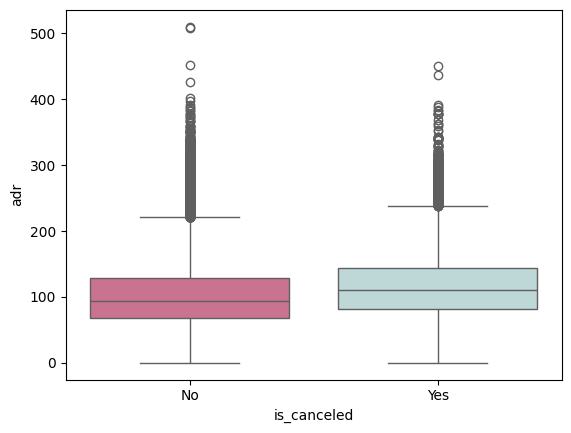

In [ ]:
sns.boxplot(x='is_canceled', y='adr', data=hotel_eda , palette = ['#d7658b', '#badbdb'])



INSIGHT - there is slight differnce between cancellation and no_cancellation , so if the price increase there is low chance that person can cancel booking

# CONCLUSION

# ✅ Conclusion of the project :
* Peak cancellations occur during the summer months (June to September), aligning with high travel seasons.

* The year `2016` saw the most`bookings`  `73.6%` ,`cancellations  26.4%` than 2015 but `2017` has fewer booking `68.1% which not cancelled` still higher `cancellation` `31.9%`.(2015 & 2016 has 12 month data but 2017 has 9 month data)

* Guests who book further in advance (long lead time) are more likely to cancel.

* City hotels experience significantly higher `cancellations (about 61.1%) `than resort hotels.

* Portugal has the highest number of guests among all countries, followed by the United Kingdom and France, showing that` most guests come from nearby European countries.`

* The 'Transient' customer type accounts for the majority of bookings `(about 82%)`,cancellations and most repeated guest (`about 86%`).

* 'Bed & Breakfast' is the most popular meal type, least is full board.

* Most bookings are made through the Travel Agent channel(`about 79.3%`) and come from earlier days (`less than 50 days`).

# 🎯 Final Recommendations :
* **Focus on Short-Lead Bookings**: Encourage last-minute deals, as short lead time bookings are more likely to be honored.

* **Target Loyal Segments**: Reward repeated guests from the Transient category with offers or discounts to build retention.

* **Tighten Cancellation Policy**: Consider stricter or tiered cancellation rules for long lead time and No Deposit bookings.

* **special offers** : Provide special offers for guests from Portugal, France ,UK as these countries show high booking volumes. This can help encourage guests to retain their bookings and reduce cancellations.

* **City Hotel Strategy**: Adjust pricing or offer incentives for city hotels during peak cancellation months (especially June–September).

* **Improve Travel Agent Handling**: Strengthen terms or coordination with travel agents to reduce bulk cancellations.